<a href="https://colab.research.google.com/github/FranklineMisango/Fashion_tester_Deep_model/blob/main/Fashion_Test_FreecodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

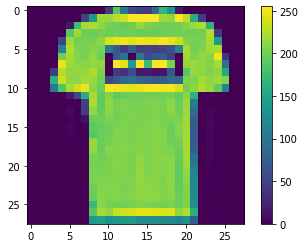

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.



In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=100)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4214 - accuracy: 0.8510
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8539
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4095 - accuracy: 0.8560
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8576
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3992 - accuracy: 0.8591
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3943 - accuracy: 0.8609
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3909 - accuracy: 0.8614
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3865 - accuracy: 0.8633
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3830 - accuracy: 0.8648
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8774
Test accuracy: 0.8773999810218811


In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([2.3365558e-07, 2.1729644e-08, 2.8592269e-06, 4.6470950e-06,
       6.4789456e-06, 1.2303495e-01, 1.7524379e-05, 2.3210028e-01,
       3.3529904e-03, 6.4147997e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

Pick a number: 9


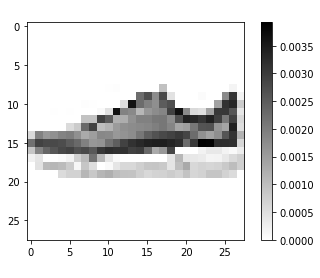

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
